# Flight Data Visualization Example

This notebook demonstrates comprehensive flight data visualization for water rocket simulations. You'll learn how to:

- Run a complete water rocket simulation
- Identify different flight phases (thrust, ballistic, descent)
- Create multiple organized plots showing all aspects of flight performance
- Analyze trajectory, forces, propellant usage, and exhaust properties

## Setup and Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

from waterrocketpy.core.simulation import WaterRocketSimulator
from waterrocketpy.rocket.builder import RocketBuilder, create_standard_rocket
from waterrocketpy.core.constants import ATMOSPHERIC_PRESSURE, INITIAL_TEMPERATURE
from waterrocketpy.visualization.plot_flight_data import (
    setup_plot_style,
    identify_flight_phases,
    plot_trajectory_and_velocity,
    plot_forces_and_acceleration,
    plot_propellant_and_pressure,
    plot_exhaust_properties,
    plot_air_exit_conditions,
    print_flight_summary
)

print("✓ All imports successful!")

✓ All imports successful!


## Setup Plotting Style

Configure matplotlib for professional-looking plots.

In [22]:
# Setup plotting style for consistent, professional plots
setup_plot_style()

print("✓ Plot style configured")

✓ Plot style configured


## Create and Configure Rocket

Set up a standard water rocket configuration for our simulation.

In [23]:
# Create a standard rocket configuration
print("Creating standard rocket...")
rocket = create_standard_rocket()

print(f"✓ Rocket created: {rocket.name}")
print(f"  - Empty mass: {rocket.empty_mass:.3f} kg")
print(f"  - Water fraction: {rocket.water_fraction:.3f}")
print(f"  - Initial pressure: {rocket.initial_pressure:.0f} Pa")
print(f"  - Nozzle diameter: {rocket.nozzle_diameter*1000:.2f} mm")

Creating standard rocket...
✓ Rocket created: Standard 2L Rocket
  - Empty mass: 0.250 kg
  - Water fraction: 0.330
  - Initial pressure: 810600 Pa
  - Nozzle diameter: 15.00 mm


## Setup and Run Simulation

Configure the simulation parameters and run the water rocket simulation.

In [24]:
# Convert rocket to simulation parameters
print("Setting up simulation...")
builder = RocketBuilder.from_dict(rocket.__dict__)
sim_params = builder.to_simulation_params()

# Create simulator and define settings
simulator = WaterRocketSimulator()
sim_settings = {
    "max_time": 100.0,    # Maximum simulation time (seconds)
    "time_step": 0.01,    # Time step for integration (seconds)
    "solver": "RK45"      # Numerical integration method
}

print("Running simulation...")
flight_data = simulator.simulate(sim_params, sim_settings)

print(f"✓ Simulation completed! {len(flight_data.time)} data points generated")
print(f"  - Flight duration: {flight_data.time[-1]:.2f} seconds")
print(f"  - Maximum altitude: {max(flight_data.altitude):.2f} meters")

Setting up simulation...
Running simulation...
Starting water expulsion phase...
Water depleted at t=0.123s, starting air expulsion phase...
Air depleted at t=0.199s, starting coasting phase...
✓ Simulation completed! 752 data points generated
  - Flight duration: 7.19 seconds
  - Maximum altitude: 61.45 meters


## Analyze Flight Phases

Identify the different phases of the rocket's flight: thrust phase, ballistic phase, and descent.

In [25]:
# Identify flight phases
print("Analyzing flight phases...")
phases = identify_flight_phases(flight_data)

# Print detailed flight summary
print_flight_summary(flight_data, phases)

Analyzing flight phases...

WATER ROCKET FLIGHT ANALYSIS SUMMARY

Flight Performance:
------------------
  Maximum Altitude         : 61.45 m
  Maximum Velocity         : 44.60 m/s
  Total Flight Time        : 7.19 s
  Time to Apogee           : 3.29 s

Phase Durations:
---------------
  Water Phase              : 0.12 s
  Air Phase                : 0.08 s
  Coasting Phase           : 6.99 s

Initial Conditions:
------------------
  Initial Water Mass       : 660.0 g
  Initial Air Mass         : 12.6 g
  Initial Pressure         : 8.11 bar
  Initial Temperature      : 300.0 K



## Visualization 1: Trajectory and Velocity

Plot the rocket's altitude and velocity over time, with flight phases highlighted.

Generating trajectory and velocity plots...


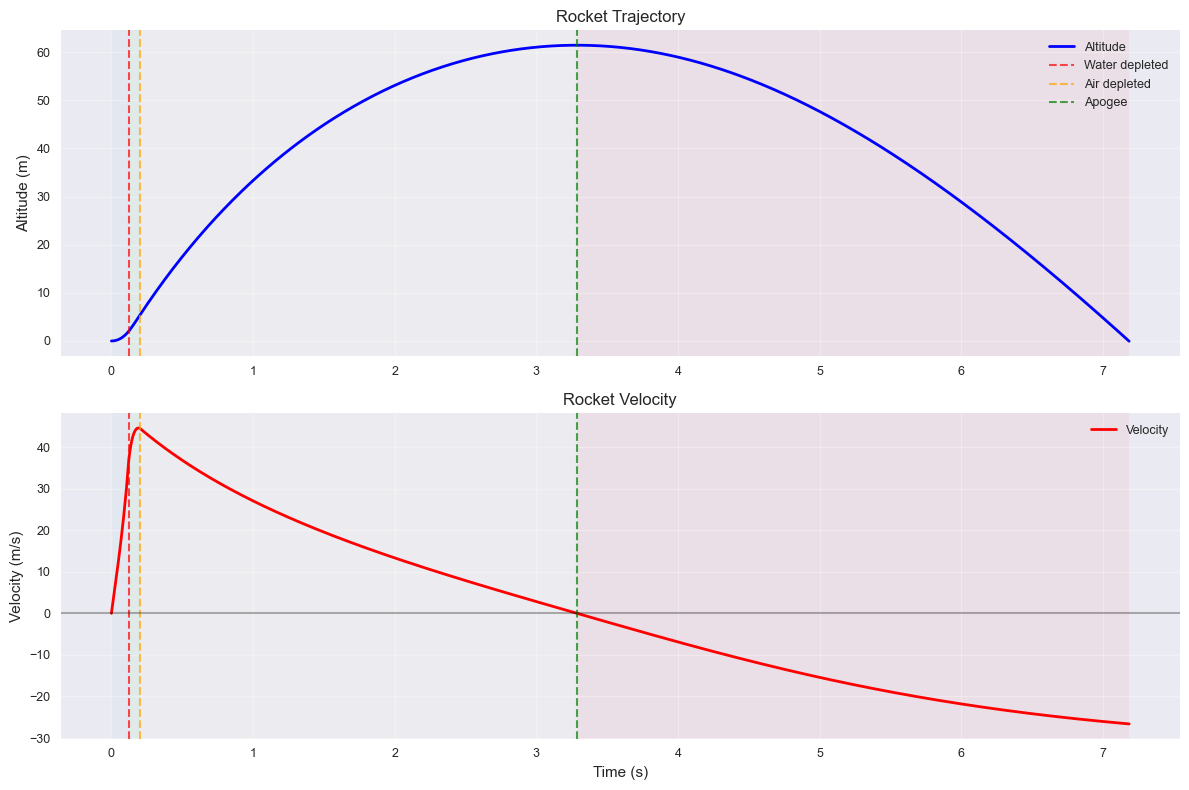

In [26]:
# Create trajectory and velocity plots
print("Generating trajectory and velocity plots...")
fig1 = plot_trajectory_and_velocity(flight_data, phases)
plt.show()

## Visualization 2: Forces and Acceleration

Analyze the forces acting on the rocket and the resulting acceleration.

Generating forces and acceleration plots...


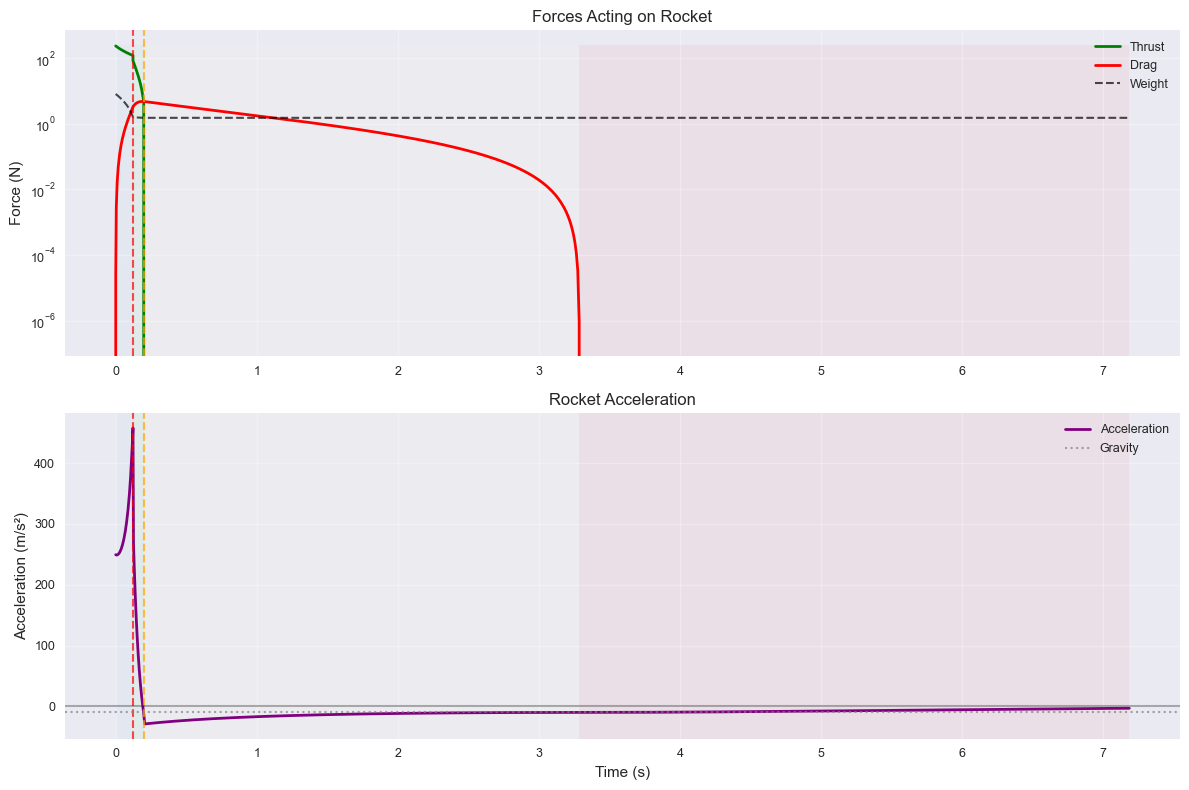

In [27]:
# Create forces and acceleration plots
print("Generating forces and acceleration plots...")
fig2 = plot_forces_and_acceleration(flight_data, phases)
plt.show()

## Visualization 3: Propellant and Pressure

Track the water mass consumption and internal pressure changes during the thrust phase.

Generating propellant and pressure plots...


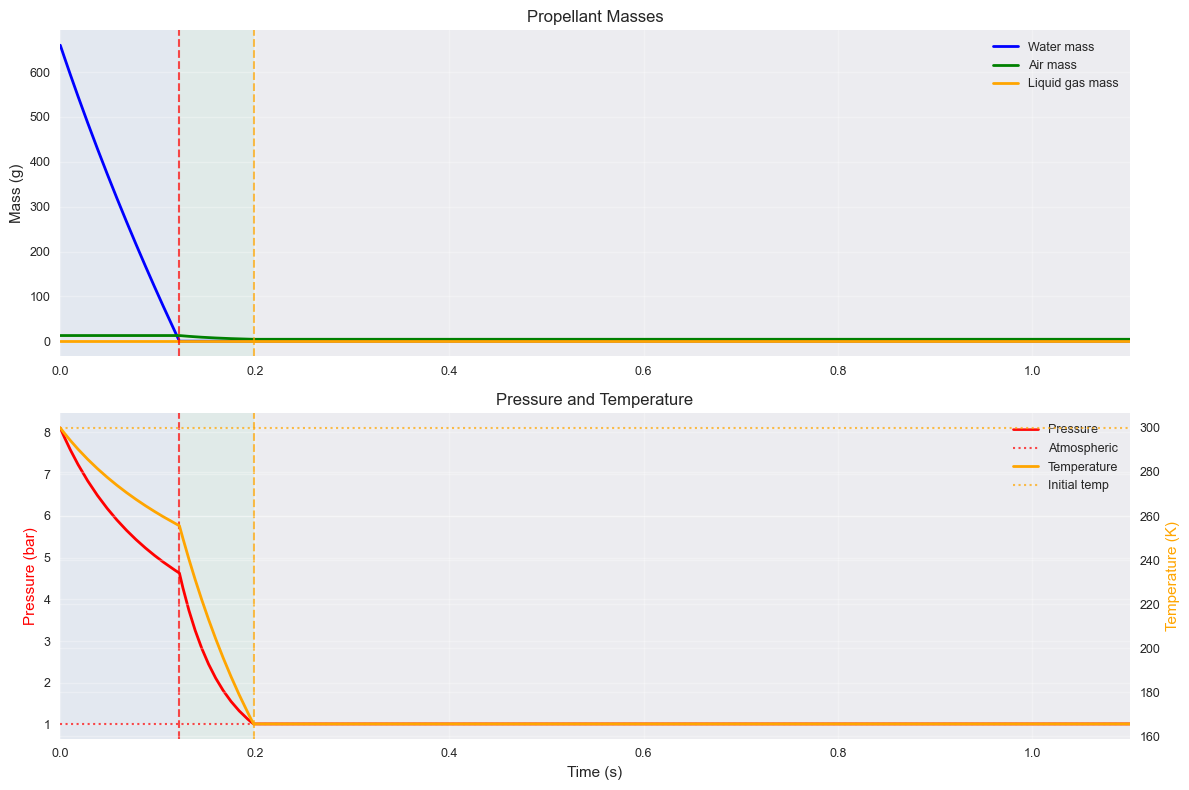

✓ Propellant and pressure plot zoomed to t = 1.000s (end of air phase)


In [28]:
# Create propellant and pressure plots with zoomed-in x-axis
print("Generating propellant and pressure plots...")
fig3 = plot_propellant_and_pressure(flight_data, phases)

# Zoom in on x-axis to show only until the end of air exhaust phase
# Get the end time of the air phase from phases data
air_end_time = phases.get('air_end_time', phases.get('thrust_end_time', 1.0))

# Apply zoom to all subplots in the figure
for ax in fig3.get_axes():
    ax.set_xlim(0, air_end_time * 1.1)  # Add 10% margin for better visibility

plt.tight_layout()
plt.show()

print(f"✓ Propellant and pressure plot zoomed to t = {air_end_time:.3f}s (end of air phase)")

## Visualization 4: Exhaust Properties

Examine the properties of the exhaust flow during the thrust phase.

Generating exhaust properties plots...


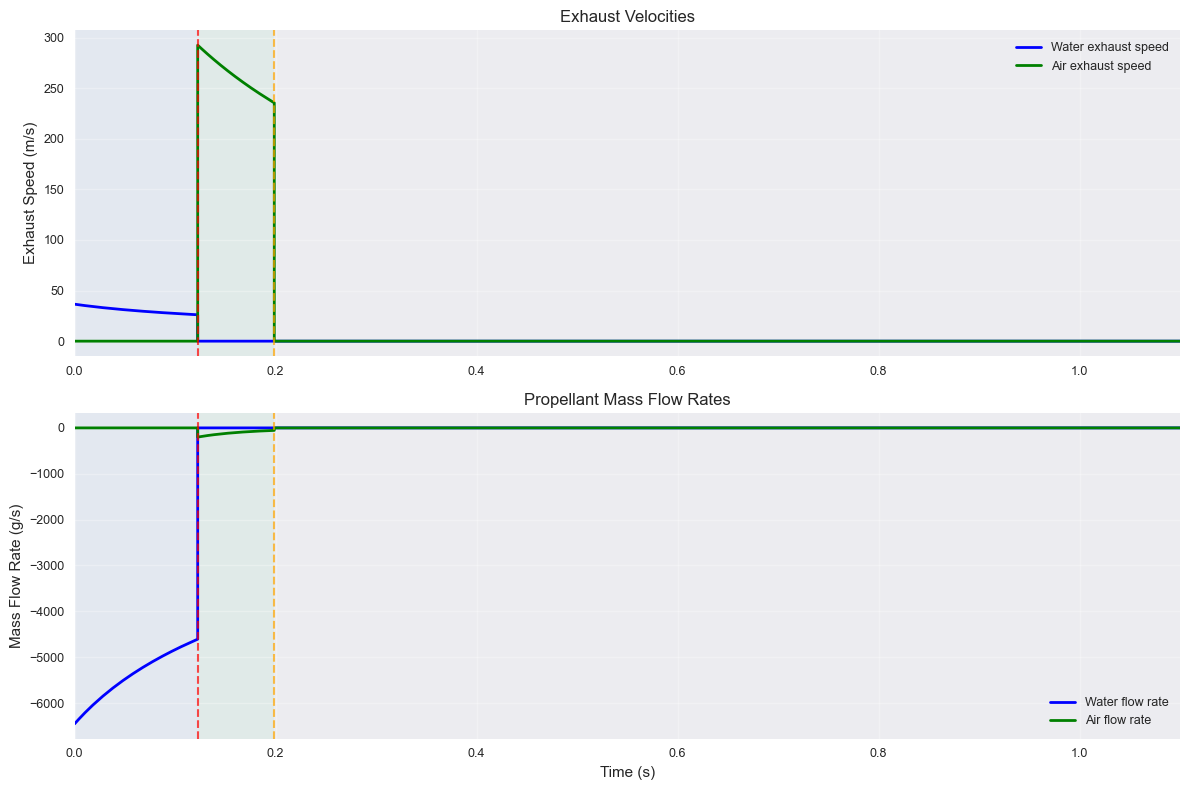

✓ Exhaust properties plot zoomed to t = 1.000s (end of air phase)


In [29]:
# Create exhaust properties plots with zoomed-in x-axis
print("Generating exhaust properties plots...")
fig4 = plot_exhaust_properties(flight_data, phases)

# Zoom in on x-axis to show only until the end of air exhaust phase
# Get the end time of the air phase from phases data
air_end_time = phases.get('air_end_time', phases.get('thrust_end_time', 1.0))

# Apply zoom to all subplots in the figure
for ax in fig4.get_axes():
    ax.set_xlim(0, air_end_time * 1.1)  # Add 10% margin for better visibility

plt.tight_layout()
plt.show()

print(f"✓ Exhaust properties plot zoomed to t = {air_end_time:.3f}s (end of air phase)")

## Visualization 5: Air Exit Conditions

Analyze the conditions of air as it exits the nozzle during the air-only thrust phase.

Generating air exit conditions plots...


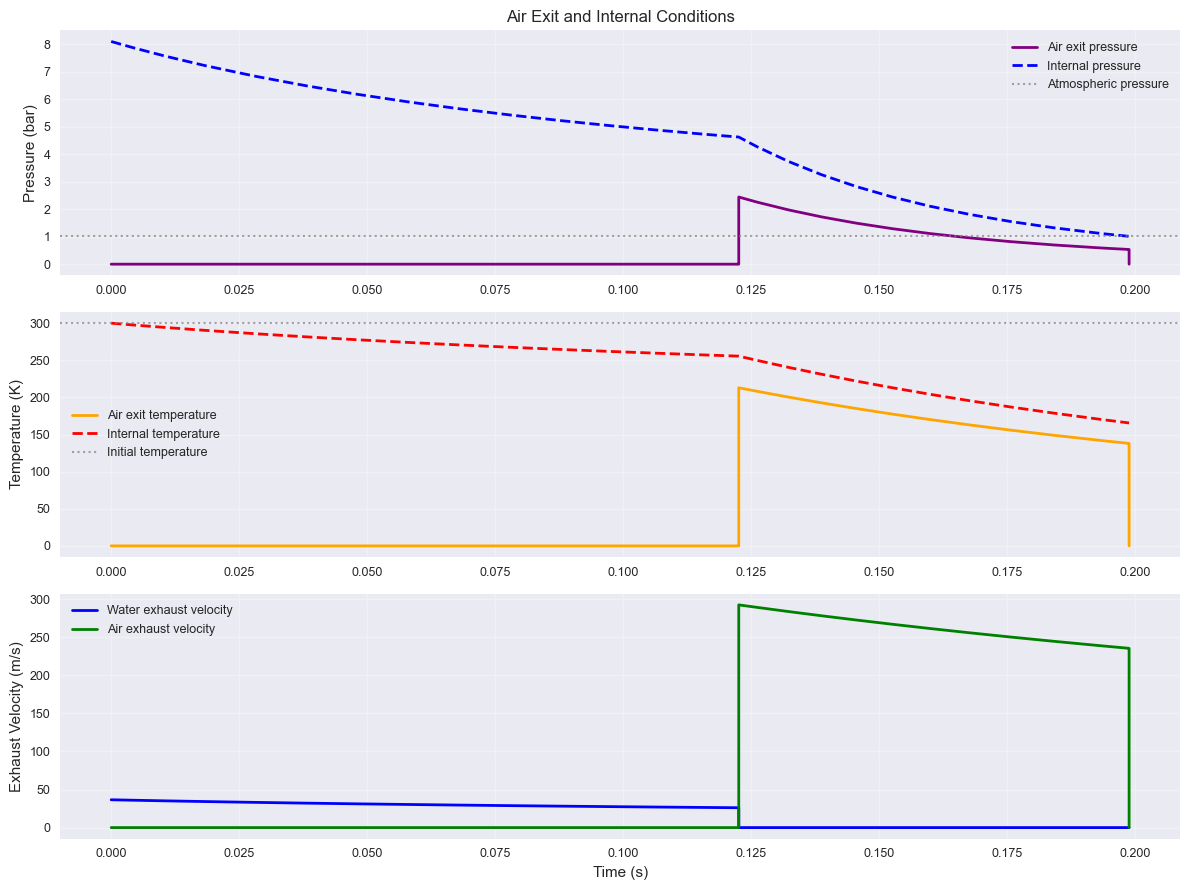

In [30]:
# Create air exit conditions plots
print("Generating air exit conditions plots...")
fig5 = plot_air_exit_conditions(flight_data, phases)
plt.show()

## Key Insights from the Visualization

From these comprehensive plots, you can observe:

Five different visualization categories:
- Trajectory and velocity plots
- Forces and acceleration analysis
- Propellant consumption and pressure dynamics
- Exhaust properties visualization
- Air exit conditions analysis

## Next Steps

Try experimenting with:
- Various simulation settings (time step, solver method)
- Comparing multiple rocket designs side by side